<div style="background-color: RGB(0,0,0)" >
<h1 style="margin: auto; padding: 20px; color:RGB(255,255,255); text-align: center">NOTEBOOK - Stéphane Srsa</h1>   
<h1 style="margin: auto; padding: 20px; color:RGB(255,255,255); text-align: center">PROJET 5</h1>
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255); text-align: center">Optimisez la gestion des données d'une boutique</h2>
</div> 
<div style="text-align:center; background-color: RGB(0,0,0);">
    <img src="CaveAVin.jpg" alt="Cave a Vins" width ="600" height ="200">
</div>    
<div style="background-color: RGB(0,0,0);" >
<h1 style="margin: auto; padding: 20px; color:RGB(51,153,153); text-align: center ">SOMMAIRE</h1>  
    
    
    
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">1 - Importation des librairies et des fichiers</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">1.1 - Importation des librairies</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">1.2 - Importation des fichiers</a>
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">2 - Analyse exploratoire des fichiers</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">2.1 - Analyse exploratoire du fichier 'erp'</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">2.2 - Analyse exploratoire du fichier 'liaison'</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">2.3 - Analyse exploratoire du fichier 'web'</a>

 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">3 - Jointures des tables </a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">3.1 - Jointure des tables 'erp' et 'liaison' => 'liaisonerp'</a>   
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">3.2 -  Jointure des tables 'web' et 'liaisonerp' => 'datawine'</a>
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">4 - Traitement de la table 'datawine'</a>     
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">4.1 - Extraction et création d'un Dataframe nommé 'idweb0' pour les produits avec un 'id-web' nul</a>        
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">4.2 - Mis à jour du Dataframe 'datawine' débarassé des 'id-web' nul</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">4.3 - Vérification des valeurs manquantes, mis à l'écart puis suppression dans le Df 'datawine'</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">4.4 - liste des différents Dataframes</a>   
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">5 - Calcul du Chiffre d'affaires par produit</a>    
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">6 - Chiffre d'affaires global réalisé sur Internet</a>     
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">7 - Analyse sur la variable 'prix'</a>
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">7.1 - Détection des Outliers avec la méthode des Interquartiles</a>  
 - <a style="margin: auto; padding: 30px; color: RGB(51,153,153); ">7.2 - Vérification des 32 références considérées comme outliers sur Internet</a> 
 - <a style="margin: auto; line-height: 2.5; padding: 10px; color:RGB(255,255,255); font-size: 20px; font-weight: bold;">8 - Analyse sur l'état des stocks sur les 10% des références les plus vendues</a>
</div>

<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
# Pour palier aux avertissements à l'utilisation de Seaborn (entre autres)
import warnings
warnings.filterwarnings("ignore")

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
erp= pd.read_csv('erp.csv')
web = pd.read_csv('web.csv')
liaison = pd.read_csv('liaison.csv')

<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">2.1 - Analyse exploratoire du fichier 'erp'</h3>
</div>

In [3]:
# Lecture des information du fichier
display(erp.tail())
print('le fichier contient ',erp.shape[0], ' lignes et ', erp.shape[1], ' colonnes')
print('')
erp.info()

,product_id,onsale_web,price,stock_quantity,stock_status
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock
824,7338,1,16.3,45,instock


le fichier contient  825  lignes et  5  colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
# Vérification valeurs manquantes
print(erp.isnull().sum())

# Détection des doublons
print('      --       ')
print(erp.loc[erp['product_id'].duplicated(keep=False),:])

# Nombre de références non vendues sur le web
print('      --       ')
print('Il y a ',erp.loc[erp['onsale_web'] == 0].shape[0],' références non proposée sur le web')

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64
      --       
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []
      --       
Il y a  108  références non proposée sur le web


In [5]:
# Vérification de l'unicité de la clé 'product_id'
if erp.size == erp.drop_duplicates('product_id').size :
        print("'product_id' peut être ultilé comme clé primaire")
else:
    print("'product_id' ne peut pas être ultilé comme clé primaire")

'product_id' peut être ultilé comme clé primaire


<div style="border: 10px solid RGB(255,255,255);" >
    <div style="background-color: RGB(102,0,51);"  >
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Le fichier 'erp' ne contient aucune valeur manquante, ni de doublons.</h4>
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Nous observons que 108 références ne sont pas en vente sur le Web.</h4>        
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">2.2 - Analyse exploratoire du fichier 'liaison'</h3>
</div>

In [6]:
# Lecture des information du fichier
display(liaison.tail())
print('le fichier contient ',liaison.shape[0], ' lignes et ', liaison.shape[1], ' colonnes')
print('')
liaison.info()

,product_id,id_web
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


le fichier contient  825  lignes et  2  colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [7]:
# Vérification valeurs manquantes
print(liaison.isnull().sum())

# Détection des doublons
liaison.loc[liaison['product_id'].duplicated(keep=False),:]

product_id     0
id_web        91
dtype: int64


,product_id,id_web


In [8]:
# convertion id_web en numeric
liaison['id_web'] = pd.to_numeric(liaison['id_web'], errors='coerce')
df = pd.DataFrame(liaison)
liaison = df.fillna(0)
# convertion id_web de Float en Int64
liaison['id_web'] = liaison['id_web'].astype(np.int64)
liaison.dtypes

product_id    int64
id_web        int64
dtype: object

In [9]:
# Nombre de 'id_web' non renseigné
nr = liaison.loc[liaison['id_web'].duplicated(keep=False),:].sort_values('id_web').shape[0]
print('Il y a', nr, "id_web non renseignés")

Il y a 94 id_web non renseignés


In [10]:
# Vérification de l'unicité de la clé 'product_id'
if liaison.size == liaison.drop_duplicates('product_id').size :
        print("'product_id' peut être ultilé comme clé primaire")
else:
    print("'product_id' ne peut pas être ultilé comme clé primaire")

'product_id' peut être ultilé comme clé primaire


<div style="border: 10px solid RGB(255,255,255);" >
    <div style="background-color: RGB(102,0,51);"  >
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">NB: 3 valeurs n'ont pas pu être converti en numérique, valeurs incohérentes (voir filtre appliqué sur Excel) - ces valeurs ont été forcées à 0.</h4>       
</div>
    
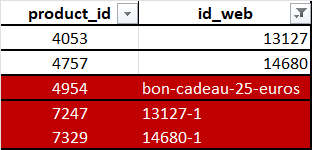

<div style="border: 10px solid RGB(255,255,255);" >
    <div style="background-color: RGB(102,0,51);"  >
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">La table 'liaison' contient 91 valeurs non renseignées et 3 valeurs forcées à 0 / il n'y a pas de doublons.</h4>       
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">2.3 - Analyse exploratoire du fichier 'web'</h3>
</div>

In [11]:
# Lecture des information du fichier
display(web.tail())
print('le fichier contient ',web.shape[0], ' lignes et ', web.shape[1], ' colonnes')
print('')
web.info()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1512,16230,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


le fichier contient  1513  lignes et  28  colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post

In [12]:
# vérification du contenu des colonnes
web.describe(include ='all')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [13]:
# suppréssion des colonnes ne cantenant aucune donnée.
columns = ['virtual', 'downloadable', 'rating_count', 'average_rating','tax_class','post_content',
           'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'comment_count']
web.drop(columns, inplace=True, axis=1)
web.describe(include ='all')

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,1428,1430.000000,716,1430.000000,1430,1430,1430,716,1430,1430,1430,1430,1430,1430,1430,1430,714
unique,714,NaN,1,NaN,716,716,713,679,1,1,1,716,589,589,1430,2,1
top,bon-cadeau-25-euros,NaN,taxable,NaN,2018-06-01 13:53:46,2018-06-01 11:53:46,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,bon-cadeau-de-25-euros,2020-08-26 15:55:03,2020-08-26 13:55:03,https://www.bottle-neck.fr/?post_type=product&...,product,image/jpeg
freq,2,NaN,716,NaN,2,2,4,12,1430,1430,1430,2,14,14,1,716,714
mean,NaN,4.006993,NaN,1.998601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.510559,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Renommer la colonne sku par id_web (concordance avec le fichier liaison)
web.rename(columns={'sku': 'id_web'}, inplace=True)

In [15]:
# Valeurs manquantes
web_na = web.isnull().sum()
web_na[web_na>0]

id_web                85
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
guid                  83
post_type             83
post_mime_type       799
dtype: int64

In [16]:
# Vérification des valeurs manquantes sur 83 lignes avec 'total_sales'
web.loc[web['total_sales'].isnull(),:]

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Nous avons 83 lignes entièrement vides de données
# Suppression des 83 lignes
web = web.dropna(subset=['total_sales'], how='all')
web_na = web.isnull().sum()
web_na[web_na>0]

id_web              2
tax_status        714
post_excerpt      714
post_mime_type    716
dtype: int64

In [18]:
# Vérification et enregistrement des deux valeurs nulles restantes de 'id_web' dans une table spécifique
web_Ref_idweb0 = web[web['id_web'].isnull()]
web_Ref_idweb0.head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [19]:
# Vérification des valeurs uniques de 'id_web'
web['id_web'].unique

<bound method Series.unique of 0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: id_web, Length: 1430, dtype: object>

In [20]:
# Vérification valeurs incohérentes sur 'id_web'
web.loc[(web['id_web'] == 'bon-cadeau-25-euros') | (web['id_web'] == '13127-1' ), :]
# Enregistrement des incohérences dans une table spécifique
web_inco = web.loc[(web['id_web'] == 'bon-cadeau-25-euros') | (web['id_web'] == '13127-1' ), :]
web_inco.head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
797,13127-1,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1209,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1511,13127-1,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


In [21]:
# Mise au format numérique de la colonne 'id_client' - les 4 valeurs incohérentes sont forcées à 0
web['id_web'] = pd.to_numeric(web['id_web'], errors='coerce')
df = pd.DataFrame(web)
web = df.fillna(0)
# convertion 'id_web' de Float en Int64
web['id_web'] = web['id_web'].astype(np.int64)

In [22]:
# Détection des doublons 
web.loc[web[['post_date', 'post_date_gmt', 
             'post_title']].duplicated(keep=False),:].sort_values(by=['post_date',
                                               'id_web'], ascending=True).head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,0
799,15298,6.0,0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,0,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0
800,15296,0.0,0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0


In [23]:
# triatement des doublons - suppression des 'post_type' = 'attachment' (concerne une image)
web = web.drop_duplicates(subset='id_web', keep='first').reset_index()
# suppresion de la colonne 'index'
web = web.drop('index', axis=1)
web.shape

(713, 17)

In [24]:
# Création d'une Dataframe comprenant uniquement l'article 'Bon cadeau 25 euros'
Bon_cadeaux = web.loc[web['post_title'] == 'Bon cadeau de 25€']
# Suppression de l'article 'Bon cadeau 25 euros' dans la table 'web'
web.drop(web[web['post_title'] == 'Bon cadeau de 25€'].index, inplace=True)
Bon_cadeaux

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,0


In [25]:
# Mise au format datetime des colonnes concernées
web['post_date'] = pd.to_datetime(web['post_date'])
web['post_date_gmt'] = pd.to_datetime(web['post_date_gmt'])
web['post_modified'] = pd.to_datetime(web['post_modified'])
web['post_modified_gmt'] = pd.to_datetime(web['post_modified_gmt'])
web.dtypes

id_web                        int64
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
post_mime_type               object
dtype: object

In [26]:
# Vérification de l'unicité de la clé 'id_web'
if web.size == web.drop_duplicates('id_web').size :
        print("'id_web' peut être ultilé comme clé primaire")
else:
    print("'id_web' ne peut pas être ultilé comme clé primaire")

'id_web' peut être ultilé comme clé primaire


<div style="border: 10px solid RGB(255,255,255);" >
    <div style="background-color: RGB(102,0,51);"  >
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Après nettoyage, le Df 'web' contient 712 valeurs renseignées.</h4>
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Un Df 'Bon_cadeaux' a été créé.</h4>  
</div>

<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">3 - Jointures des tables </h3>
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">3.1 - Jointure des tables 'erp' et 'liaison'</h3>
</div>

In [27]:
# Jointure des tables liaisson et erp
liaisonerp = pd.merge(liaison, erp, on=['product_id'], how ='outer', indicator=True)
print(liaisonerp.tail())
# Nombre de 'id_web' non renseigné
nbidweb0 = liaisonerp.loc[liaisonerp['id_web'] == 0]
print(' ')
print('Il y a',nbidweb0.shape[0], 'lignes non renseignées sur 825')
# Vérification de la jointure
print('Il y a',liaisonerp[liaisonerp['_merge']!='both'].shape[0], "jointure différente de 'both'")

     product_id  id_web  onsale_web  price  stock_quantity stock_status _merge
820        7203       0           0   45.0              30      instock   both
821        7204       0           0   45.0               9      instock   both
822        7247       0           1   54.8              23      instock   both
823        7329       0           0   26.5              14      instock   both
824        7338   16230           1   16.3              45      instock   both
 
Il y a 94 lignes non renseignées sur 825
Il y a 0 jointure différente de 'both'


<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">3.2 - Jointure des tables 'web' et 'liaisonerp'</h3>
</div>

In [28]:
# Suppression de la colonne '_merge'
liaisonerp = liaisonerp.drop(['_merge'], axis=1)
# Jointure des tables liaissonerp et web
datawine = pd.merge(liaisonerp, web, on=['id_web'], how ='outer', indicator=True)
# Nombre de 'id_web' non renseigné
nbidweb0 = datawine.loc[datawine['id_web'] == 0]
# Vérification de la jointure
lc = datawine[datawine['_merge']!='both'].shape[0] - nbidweb0.shape[0]
print('Il y a',datawine[datawine['_merge']!='both'].shape[0], "jointures différentes de 'both'")
print('Il y a ',nbidweb0.shape[0], 'lignes non renseignées sur 825')
print('Soit', nbidweb0.shape[0], 'lignes à supprimer et', lc, 'à vérifier')

Il y a 113 jointures différentes de 'both'
Il y a  94 lignes non renseignées sur 825
Soit 94 lignes à supprimer et 19 à vérifier


<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">4 - Traitement de la table 'datawine'</h3>
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">4.1 - Extraction et création d'un Dataframe nommé 'idweb0' pour les produits avec un 'id-web' nul</h3>
</div>

In [29]:
# Suppression de la colonne '_merge'
datawine = datawine.drop(['_merge'], axis=1)
# Création d'une dataframe reprenant les produits_id sans correspondance web
idweb0 = datawine.loc[(datawine['id_web'] == 0), :].reset_index()
# suppresion de la colonne 'index'
idweb0 = idweb0.drop('index', axis=1)
# Affichage
print(idweb0.shape)
idweb0.tail()

(94, 22)


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
89,7201,0,0,31.0,18,instock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
90,7203,0,0,45.0,30,instock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
91,7204,0,0,45.0,9,instock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
92,7247,0,1,54.8,23,instock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
93,7329,0,0,26.5,14,instock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">4.2 - Mis à jour du Dataframe 'datawine' débarassé des 'id-web' nul</h3>
</div>

In [30]:
# Création d'une dataframe reprenant les produits référencés sur le web
datawine = datawine.loc[(datawine['id_web'] != 0), :].reset_index()
# suppresion de la colonne 'index'
datawine = datawine.drop('index', axis=1)
print('il reste ',datawine.shape[0], 'produits référencés.')

il reste  731 produits référencés.


<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">4.3 - Vérification des valeurs manquantes, mis à l'écart dans un Df nommé 'datawine_valeurs_manquantes' puis suppression dans le Df 'datawine'</h3>
</div>

In [31]:
# Vérification valeurs manquantes
datawine.isnull().sum()

product_id            0
id_web                0
onsale_web            0
price                 0
stock_quantity        0
stock_status          0
total_sales          19
tax_status           19
post_author          19
post_date            19
post_date_gmt        19
post_title           19
post_excerpt         19
post_status          19
comment_status       19
ping_status          19
post_name            19
post_modified        19
post_modified_gmt    19
guid                 19
post_type            19
post_mime_type       19
dtype: int64

In [32]:
# Liste des lignes contenant des valeurs manquantes et création d'un df reprenant ces lignes
datawine_valeurs_manquantes = datawine.loc[datawine['total_sales'].isnull(),:].reset_index()
# suppresion de la colonne 'index'
datawine_valeurs_manquantes = datawine_valeurs_manquantes.drop('index', axis=1)
print(datawine_valeurs_manquantes.shape)
datawine_valeurs_manquantes.tail(1)

(19, 22)


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
18,6100,15529,0,12.9,0,outofstock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [33]:
# datawine.drop([datawine.loc[datawine['total_sales'].isnull()]].index, inplace=True)
datawine = datawine.dropna(subset=['total_sales']).reset_index()
# suppresion de la colonne 'index'
datawine = datawine.drop('index', axis=1)
print(datawine.shape)
datawine.tail(1)

(712, 22)


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
711,7338,16230,1,16.3,45,instock,0.0,taxable,2.0,2020-07-20 11:00:00,...,Issu d'un assemblage de chenin blanc et de cha...,publish,closed,closed,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,0


<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">4.4 - liste des différents Dataframes</h3>
</div>

In [34]:
# DF concernant les valeurs incohérentes du fichier 'web'
web_inco

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
797,13127-1,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1209,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1511,13127-1,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


In [35]:
# DF concernant les 94 id_web non renseignés
idweb0.tail(1)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
93,7329,0,0,26.5,14,instock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [36]:
# DF concernant les 19 références web non renseignées
datawine_valeurs_manquantes.tail(1)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
18,6100,15529,0,12.9,0,outofstock,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [37]:
# DF concernant les 2 références web renseignées sans 'id_web'
web_Ref_idweb0

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


<div style="border: 10px solid RGB(255,255,255);" >
    <div style="background-color: RGB(102,0,51);"  >
<h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Ci-après, les Dataframes utilisés par la suite</h4>       
</div>
    

In [38]:
# DF concernant les bons cadeaux (utile pour le calcul du CA web)
Bon_cadeaux

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,0


In [39]:
# DF concernant les 712 références sur lesquelles nous pouvons réaliser nos analyses
datawine.tail(1)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
711,7338,16230,1,16.3,45,instock,0.0,taxable,2.0,2020-07-20 11:00:00,...,Issu d'un assemblage de chenin blanc et de cha...,publish,closed,closed,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,0


<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">5 - Calcul du Chiffre d'affaires par produit</h3>
</div>

In [40]:
# Ajout de la colonne CA
datawine['Ca_produit'] = datawine.price * datawine.total_sales
# Création d'un Df reprenant les informations utiles
wineca = datawine[['product_id','id_web','price','total_sales', 'Ca_produit', 
                   'stock_quantity', 'post_title', 'post_excerpt', 'post_date', 'post_date_gmt']]
# Classement par 'Ca_produit'
wineca.sort_values(by=['Ca_produit'], ascending=False).head(3)

,product_id,id_web,price,total_sales,Ca_produit,stock_quantity,post_title,post_excerpt,post_date,post_date_gmt
194,4334,7818,49.0,96.0,4704.0,0,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,2018-03-01 14:02:44,2018-03-01 13:02:44
71,4144,1662,49.0,87.0,4263.0,11,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",2018-02-13 13:17:25,2018-02-13 12:17:25
218,4402,3510,176.0,13.0,2288.0,8,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2018-03-22 11:21:05,2018-03-22 10:21:05


<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">6 - Chiffre d'affaires global réalisé sur Internet</h3>
</div>

In [41]:
# CA des bouteilles vendues sur le web
cav = wineca['Ca_produit'].sum()
# CA des Bons cadeaux vendus sur le web
cabc = Bon_cadeaux['total_sales'].sum()*25
# Affichage des CA 
somme =pd.DataFrame([["Chiffre d'affaires bouteilles sur le web", f"{cav:,}", wineca.shape[0]], 
                     ["Chiffre d'affaires 'bon cadeaux' sur le web", cabc , Bon_cadeaux.shape[0]], 
                     ["Chiffre d'affaires global sur le web", f"{cav+cabc:,}", 
                      wineca.shape[0]+Bon_cadeaux.shape[0]]], 
                    columns=[' ', "Chiffre d'Affaires", 'Nbr Références'])
somme

,,Chiffre d'Affaires,Nbr Références
0,Chiffre d'affaires bouteilles sur le web,"70,318.6",712
1,Chiffre d'affaires 'bon cadeaux' sur le web,250.0,1
2,Chiffre d'affaires global sur le web,"70,568.6",713


<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">7 - Analyse sur la variable 'prix'</h3>
</div>

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">7.1 - Détection des Outliers avec la  méthode des Interquartiles</h3>
</div>

,,Valeur
0,IQR,28.04
1,Q1,14.09
2,Q3,42.12
3,Limite basse,-27.97
4,Limite haute,84.18


,index,product_id,id_web,price,total_sales,Ca_produit,stock_quantity,post_title,post_excerpt,post_date,post_date_gmt
0,199,4352,15940,225.0,5.0,1125.0,0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,2018-03-02 10:30:04,2018-03-02 09:30:04
1,425,5001,14581,217.5,0.0,0.0,20,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,2018-07-17 09:45:39,2018-07-17 07:45:39
2,586,5892,14983,191.3,3.0,573.9,10,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,2019-03-28 10:21:36,2019-03-28 09:21:36


Il y a  32 Outliers


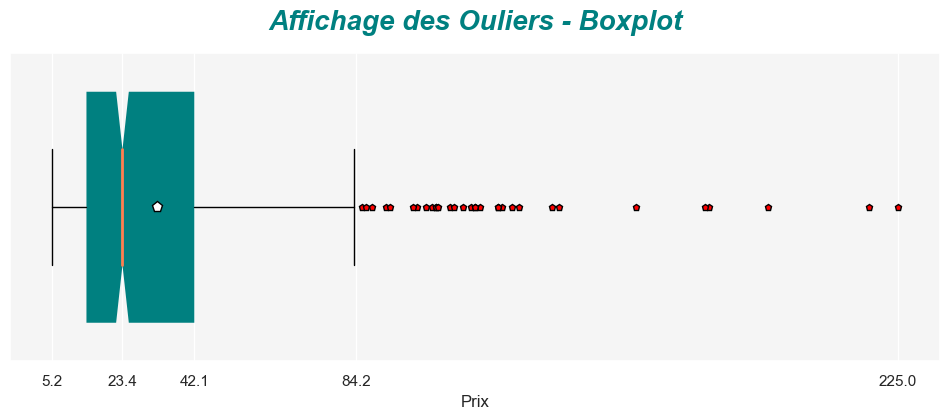

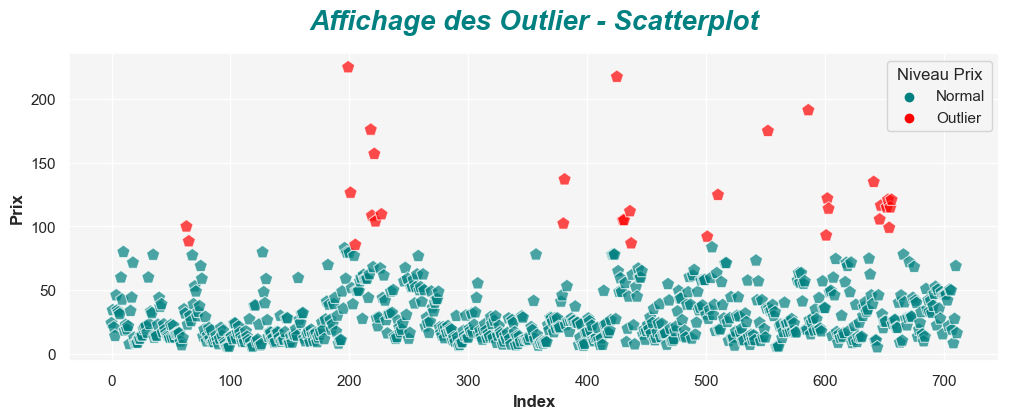

In [42]:
# Calcul des interquartiles
q1, q3 = np.percentile(wineca['price'], [25, 75])
#q3 = np.percentile(wineca['price'], 75)
iqr = q3 - q1
# Calcule les valeurs limite
Limite_B = q1 -(1.5 * iqr)
Limite_H = q3 +(1.5 * iqr)
# Affichage des CA
display(pd.DataFrame([["IQR", '%.2f' %iqr], ["Q1", '%.2f' %q1], ["Q3", '%.2f' %q3], 
                      ["Limite basse", '%.2f' %Limite_B], ["Limite haute", '%.2f' %Limite_H]],
                    columns=[' ', "Valeur"]))

# Création d'un Df 'winelier' reprenant les outliers
winelier = wineca[wineca['price'] > Limite_H]
display(winelier.sort_values(by=['price'], ascending=False).reset_index().head(3))
print('Il y a ',winelier.shape[0],'Outliers')

# Création du Graphique Boxplot
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
plt.title("Affichage des Ouliers - Boxplot", y=1.05, 
          fontdict={'size': 20, 'weight': 'bold', 'style':'italic', 'color': 'teal'})
ax.boxplot(wineca["price"], vert=False, manage_ticks=True, 
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(marker='p', markerfacecolor='red', markersize=5, 
                                markeredgecolor='black'), 
                notch = True, patch_artist=True, showfliers=True, showmeans=True,
                medianprops=dict(linestyle='-', linewidth=2, color='coral'),
                meanprops=dict(marker='p',markerfacecolor='white', markeredgecolor='black', 
                               markersize=8),
                boxprops = dict(linestyle='-', linewidth=0, facecolor='teal', color='teal'))
ax.set_xlabel('Prix')
ax.set_yticks([])
quantiles = np.quantile(wineca["price"], np.array([0.00, 0.5, 0.75, 0.95535, 1]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='r', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.9, 1.1)
ax.set_xticks(quantiles)
plt.show()

# Création du Graphique Boxplot
def f(row):
    if row['price'] > Limite_H:
        val = "Outlier"
    else:
        val = "Normal"
    return val;
wineca['Niveau Prix'] = wineca.apply(f, axis=1)
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})
fig = plt.figure(figsize=(12, 4))
plt.ylabel('Prix', fontweight='bold')
plt.xlabel('Index', fontweight='bold')
plt.title("Affichage des Outlier - Scatterplot", y=1.05, 
          fontdict={'size': 20, 'weight': 'bold', 'style':'italic', 'color': 'teal'})
plt.legend(labels=['Valeur normale', 'Outlier'])
sns.scatterplot(data=wineca, x=wineca.index, y='price', marker='p', s=100, alpha=0.7,
              hue='Niveau Prix', palette=['teal', 'red'], legend='full')
plt.show()

<div style="background-color: RGB(51,153,153); border: 10px solid RGB(0,0,0)" >
    <h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">7.2 - Vérification des 32 références considérées comme outliers sur Internet</h3>
</div>

In [43]:
display(winelier.head(10))
winetitle = winelier[ 'post_title']
winetitle = winetitle.replace(" ", "+", regex=True)
winetitle = ("https://www.google.com/search?q=" + winetitle + "&start")

,product_id,id_web,price,total_sales,Ca_produit,stock_quantity,post_title,post_excerpt,post_date,post_date_gmt
63,4115,15382,100.0,0.0,0.0,11,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",2018-02-13 11:08:45,2018-02-13 10:08:45
65,4132,11668,88.4,0.0,0.0,5,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,2018-02-13 11:43:55,2018-02-13 10:43:55
199,4352,15940,225.0,5.0,1125.0,0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,2018-03-02 10:30:04,2018-03-02 09:30:04
201,4355,12589,126.5,11.0,1391.5,2,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,2018-03-02 10:46:10,2018-03-02 09:46:10
205,4359,13853,85.6,1.0,85.6,0,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,2018-03-02 11:11:48,2018-03-02 10:11:48
218,4402,3510,176.0,13.0,2288.0,8,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2018-03-22 11:21:05,2018-03-22 10:21:05
219,4404,3507,108.5,2.0,217.0,2,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",2018-03-22 11:32:55,2018-03-22 10:32:55
221,4406,7819,157.0,0.0,0.0,3,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,2018-03-22 11:42:48,2018-03-22 10:42:48
222,4407,3509,104.0,1.0,104.0,6,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,2018-03-22 11:49:53,2018-03-22 10:49:53
227,4582,12857,109.6,0.0,0.0,7,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,2018-04-12 17:56:13,2018-04-12 15:56:13


In [44]:
# liste des recherches Internet pour vérification des prix
pd.options.display.max_colwidth = 150
display(winetitle.head(10))

63       https://www.google.com/search?q=Zind-Humbrecht+Riesling+Grand+Cru+Rangen+De+Thann+Clos+Saint-Urbain+2017&start
65     https://www.google.com/search?q=Zind-Humbrecht+Pinot+Gris+Grand+Cru+Rangen+De+Thann+Clos+Saint-Urbain+2012&start
199                                https://www.google.com/search?q=Champagne+Egly-Ouriet+Grand+Cru+Millésimé+2008&start
201                                https://www.google.com/search?q=Champagne+Egly-Ouriet+Grand+Cru+Blanc+de+Noirs&start
205               https://www.google.com/search?q=Champagne+Larmandier-Bernier+Grand+Cru+Les+Chemins+d'Avize+2011&start
218                                                          https://www.google.com/search?q=Cognac+Frapin+VIP+XO&start
219                                         https://www.google.com/search?q=Cognac+Frapin+Château+de+Fontpinot+XO&start
221                          https://www.google.com/search?q=Cognac+Frapin+Château+de+Fontpinot+1989+20+Ans+d'Age&start
222                                     

<div style="border: 10px solid RGB(255,255,255); background-color: RGB(102,0,51)" >
    <h3 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Interprétation : </h3>
    <h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Les outliers ne sont pas des valeurs incohérentes. </h4>
    <h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">En vérifiant les appélations sur Internet, nous constatons que les niveaux de prix sont équivalents. </h4>
    <h3 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Conclusion : </h3>
    <h4 style="margin: auto; padding: 10px; color: RGB(255,255,255); ">Tous les prix, et donc références doivent être conservés dans le Dataframe final, y compris les 'Outliers'. </h4>
</div>

<div style="border: 10px solid RGB(51,153,153); background-color: RGB(0,0,0)" >
    <h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); ">8 - Analyse sur l'état des stocks sur les 10% des références les plus vendues</h2>
    <h4 style="margin: auto; padding: 10px; color: RGB(51,153,153); ">  Alerte stock par défaut = 10% du CA réalisé.</h4>
    <h4 style="margin: auto; padding: 10px; color: RGB(51,153,153); ">  Alerte stock à modifier suivant la régle fixée par Bottleneck.</h4>
</div>

384 références ont été vendues au moins 1 fois
Nous retenons les 40 références les plus vendues


,product_id,id_web,price,total_sales,Ca_produit,stock_quantity,post_title,post_excerpt,alerte stock,Alerte
0,4334,7818,49.0,96.0,4704.0,0,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la surface avec legerete. La robe est d’une nuance doree assez pale. Le nez a la fois mineral et floral r...,470.0,A commander
1,4144,1662,49.0,87.0,4263.0,11,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa forme fraîche comme dans celle de confiture ou de fruits cuits. La bouche est structurée tout en éta...",426.0,A commander
2,4068,16416,16.6,62.0,1029.2,157,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cerise noire, de prune, puis de poivre et de violette, ce Crozes-Hermitage nous séduit agréablement. L...",103.0,Stock ok
3,4200,16295,5.8,46.0,266.8,190,Moulin de Gassac IGP Pays d'Hérault Guilhem Rosé 2019,"Rosé très agréable, intense, floral et minéral. Bel équilibre sur la fraîcheur avec des arômes de petits fruits rouges. Superbe gourmandise grâce ...",27.0,Stock ok


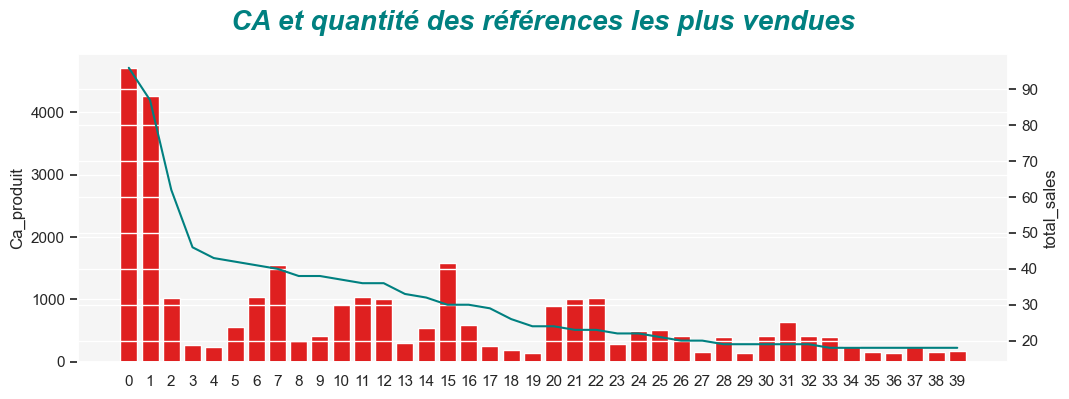

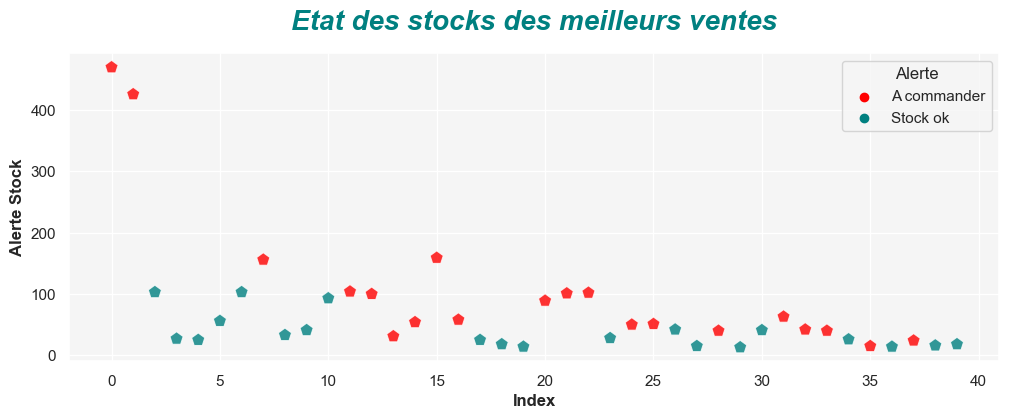

In [45]:
# Nombre de références ayant été commandées sur le web
winestock = datawine[['product_id','id_web','price','total_sales', 'Ca_produit', 
                   'stock_quantity', 'post_title', 'post_excerpt']]
winestock = winestock.loc[winestock['total_sales'] > 0]
print(colored("{} références ont été vendues au moins 1 fois".format(winestock.shape[0]), 
              'light_blue', 'on_light_grey', attrs=['bold']))
print(colored("Nous retenons les {} références les plus vendues".format(round((winestock.shape[0]/10+2))), 
              'light_blue', 'on_light_grey', attrs=['bold']))

# Création d'un Df contenant les 40 références les plus vendues
winestock = winestock.sort_values(by=['total_sales'], ascending=False).reset_index().head(40)
# suppresion de la colonne 'index'
winestock = winestock.drop('index', axis=1)
# Ajout d'une colonne indiquant une alerte stock à 10%
winestock['alerte stock'] = round((winestock['Ca_produit']*(10/100)),0)
winestock['Alerte'] = np.where(winestock['alerte stock'] >= winestock['stock_quantity'], 
                               'A commander', 'Stock ok')
display(winestock.head(4))
# Graphique
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})
fig, ax1 = plt.subplots(figsize=(12, 4))
plt.title("CA et quantité des références les plus vendues", y=1.05, 
          fontdict={'size': 20, 'weight': 'bold', 'style':'italic', 'color': 'teal'})
ax2 = ax1.twinx()
sns.barplot(data=winestock, x=winestock.index, y='Ca_produit', color='red', ax=ax1)
sns.lineplot(data=winestock,
            x=winestock.index, y='total_sales', color='teal', ax=ax2)

fig, ax1 = plt.subplots(figsize=(12, 4))
plt.ylabel('Alerte Stock', fontweight='bold')
plt.xlabel('Index', fontweight='bold')
plt.title("Etat des stocks des meilleurs ventes", y=1.05, 
          fontdict={'size': 20, 'weight': 'bold', 'style':'italic', 'color': 'teal'})
sns.scatterplot(data=winestock, x=winestock.index, y='alerte stock', marker='p', s=100, alpha=0.8,
              hue='Alerte', palette=['red', 'teal'], legend='full')
plt.show()

# Création d'un Df reprenant les références à commander
winecommande = winestock.loc[winestock['Alerte'] == 'A commander'].reset_index()
# Suppresion de la colonne 'index'
winecommande = winecommande.drop('index', axis=1)

<div style="border: 10px solid RGB(0,0,0); width: 600px; background-color: RGB(110,15,15); margin: auto; text-align: center;" >
    <h2 style="margin: center; padding: 10px; color: RGB(255,255,255); ">Fichier des Articles à commander </h2>
</div>

In [46]:
winecommande.head()

,product_id,id_web,price,total_sales,Ca_produit,stock_quantity,post_title,post_excerpt,alerte stock,Alerte
0,4334,7818,49.0,96.0,4704.0,0,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la surface avec legerete. La robe est d’une nuance doree assez pale. Le nez a la fois mineral et floral r...,470.0,A commander
1,4144,1662,49.0,87.0,4263.0,11,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa forme fraîche comme dans celle de confiture ou de fruits cuits. La bouche est structurée tout en éta...",426.0,A commander
2,4141,304,39.0,40.0,1560.0,1,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits rouges mûrs (cassis), le froment, les fruits secs, le pain d’épice, la confiture de vieux garçon......",156.0,A commander
3,4153,16237,29.0,36.0,1044.0,0,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est très aromatique avec beaucoup de délicatesse et un grain de tanin fin en final. Mis en bouteille après...",104.0,A commander
4,4891,15807,27.9,36.0,1004.4,0,Jacqueson Rully Blanc 1er Cru La Pucelle 2018,"<div id=""wrapper"">\n<div id=""container-wrapper"">\n<div id=""content-wrapper"">\n<div class=""contenu""><section id=""vue"">\n<div class=""wysiwyg"">\n\nCe...",100.0,A commander
